Renewable energy sources

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [3]:
cwd = os.getcwd()
print(cwd)

C:\Users\Jan Schoonbrood\Homework\Project-Data-Science\renewables


In [6]:
df = pd.read_csv('API_EG.FEC.RNEW.ZS_DS2_en_csv_v2.csv', index_col=0, skiprows=4)

In [7]:
df.head()

Country Code                                     Indicator Name  \
Country Name                                                                   
Aruba                 ABW  Renewable energy consumption (% of total final...   
Afghanistan           AFG  Renewable energy consumption (% of total final...   
Angola                AGO  Renewable energy consumption (% of total final...   
Albania               ALB  Renewable energy consumption (% of total final...   
Andorra               AND  Renewable energy consumption (% of total final...   

              Indicator Code  1960  1961  1962  1963  1964  1965  1966  \
Country Name                                                             
Aruba         EG.FEC.RNEW.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan   EG.FEC.RNEW.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Angola        EG.FEC.RNEW.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania       EG.FEC.RNEW.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Andorra       EG.FEC.RNEW.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                 ...            2009       2010       2011       2012  \
Country Name     ...                                                    
Aruba            ...        0.299774   5.464716   5.661789   6.855850   
Afghanistan      ...       17.813855  14.839809  10.793828  13.973584   
Angola           ...       55.748971  54.193825  52.715687  52.245733   
Albania          ...       37.216639  37.115330  35.962531  40.048297   
Andorra          ...       17.515951  19.090727  18.971541  19.195534   

                   2013       2014  2015  2016  2017  Unnamed: 62  
Country Name                                                       
Aruba          6.894805   6.922234   NaN   NaN   NaN          NaN  
Afghanistan   14.278454  16.748996   NaN   NaN   NaN          NaN  
Angola        50.686111  50.797466   NaN   NaN   NaN          NaN  
Albania       41.288978  38.689497   NaN   NaN   NaN          NaN  
Andorra       19.563701  19.886327   NaN   NaN   NaN          NaN  

[5 rows x 62 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              0 non-null float64
1980              0 non-null float64


In [11]:
#drop all columns where all values are Nan
renew_df = df.dropna(axis=1, how='all')

In [33]:
renew_df.set_index('Country Code', inplace =True)


In [13]:
#load other csv file
meta_coun_df = pd.read_csv('Metadata_Country_API_EG.FEC.RNEW.ZS_DS2_en_csv_v2.csv', index_col = 0)

In [22]:
meta_coun_df.head()
meta_coun_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, ABW to ZWE
Data columns (total 5 columns):
Region          217 non-null object
IncomeGroup     217 non-null object
SpecialNotes    147 non-null object
Country         263 non-null object
Unnamed: 5      0 non-null float64
dtypes: float64(1), object(4)
memory usage: 22.3+ KB


In [17]:
meta_coun_df.rename(columns={'TableName' : 'Country'}, inplace = True)
meta_coun_df.head()

Region          IncomeGroup  \
Country Code                                                   
ABW           Latin America & Caribbean          High income   
AFG                          South Asia           Low income   
AGO                  Sub-Saharan Africa  Lower middle income   
ALB               Europe & Central Asia  Upper middle income   
AND               Europe & Central Asia          High income   

                                                   SpecialNotes      Country  \
Country Code                                                                   
ABW           SNA data for 2000-2011 are updated from offici...        Aruba   
AFG           Fiscal year end: March 20; reporting period fo...  Afghanistan   
AGO                                                         NaN       Angola   
ALB                                                         NaN      Albania   
AND           WB-3 code changed from ADO to AND to align wit...      Andorra   

              Unnamed: 5  
Country Code              
ABW                  NaN  
AFG                  NaN  
AGO                  NaN  
ALB                  NaN  
AND                  NaN

In [34]:
df_merged = renew_df.merge(meta_coun_df, how='left', left_index=True, right_index=True)

In [35]:
df_merged.info()
df_merged.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, ABW to ZWE
Data columns (total 32 columns):
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1990              236 non-null float64
1991              237 non-null float64
1992              240 non-null float64
1993              241 non-null float64
1994              241 non-null float64
1995              242 non-null float64
1996              242 non-null float64
1997              242 non-null float64
1998              242 non-null float64
1999              242 non-null float64
2000              246 non-null float64
2001              247 non-null float64
2002              249 non-null float64
2003              249 non-null float64
2004              249 non-null float64
2005              250 non-null float64
2006              250 non-null float64
2007              252 non-null float64
2008              252 non-null float64
2009              252 non-null float64
2010              252 non-null float64
201

Indicator Name  \
Country Code                                                      
ABW           Renewable energy consumption (% of total final...   
AFG           Renewable energy consumption (% of total final...   
AGO           Renewable energy consumption (% of total final...   
ALB           Renewable energy consumption (% of total final...   
AND           Renewable energy consumption (% of total final...   
ARB           Renewable energy consumption (% of total final...   
ARE           Renewable energy consumption (% of total final...   
ARG           Renewable energy consumption (% of total final...   
ARM           Renewable energy consumption (% of total final...   
ASM           Renewable energy consumption (% of total final...   

              Indicator Code       1990       1991       1992       1993  \
Country Code                                                               
ABW           EG.FEC.RNEW.ZS   0.198601   0.169457   0.173962   0.139492   
AFG           EG.FEC.RNEW.ZS  15.924533  17.036443  26.521627  30.585669   
AGO           EG.FEC.RNEW.ZS  72.255231  71.888622  72.723260  71.277040   
ALB           EG.FEC.RNEW.ZS  25.518087  32.998167  46.813324  51.152049   
AND           EG.FEC.RNEW.ZS  14.273550  14.273550  14.308754  13.918955   
ARB           EG.FEC.RNEW.ZS   7.855062   7.678697   7.255778   7.064818   
ARE           EG.FEC.RNEW.ZS   0.000000   0.000000   0.188369   0.150356   
ARG           EG.FEC.RNEW.ZS   8.922904   8.748181   9.471647  10.128341   
ARM           EG.FEC.RNEW.ZS   2.118945   2.309436   6.677679  12.936834   
ASM           EG.FEC.RNEW.ZS   0.000000   0.000000   0.000000   0.000000   

                   1994       1995       1996       1997     ...      \
Country Code                                                 ...       
ABW            0.127387   0.111640   0.107174   0.102256     ...       
AFG           32.796250  35.075641  37.945749  41.432601     ...       
AGO           72.220252  73.945868  73.139602  73.734418     ...       
ALB           51.459544  50.609721  51.636363  55.953353     ...       
AND           14.561024  14.481048  14.100048  14.194002     ...       
ARB            7.221896   7.121167   7.102946   7.581509     ...       
ARE            0.120145   0.112604   0.080332   0.076356     ...       
ARG           10.734912  11.205186  10.193856  10.999071     ...       
ARM           17.763653   9.274353  12.473303  10.120113     ...       
ASM            0.000000   0.000000   0.000000   0.000000     ...       

                   2010       2011       2012       2013       2014  \
Country Code                                                          
ABW            5.464716   5.661789   6.855850   6.894805   6.922234   
AFG           14.839809  10.793828  13.973584  14.278454  16.748996   
AGO           54.193825  52.715687  52.245733  50.686111  50.797466   
ALB           37.115330  35.962531  40.048297  41.288978  38.689497   
AND           19.090727  18.971541  19.195534  19.563701  19.886327   
ARB            4.854648   4.701780   4.179736   4.231887   4.184590   
ARE            0.122596   0.120927   0.119841   0.132213   0.167807   
ARG            8.961446  10.116848   9.866700  10.220855  10.773125   
ARM            9.359817   8.009615   6.565712   6.771218   7.724734   
ASM            0.000000   0.000000   0.702427   0.703140   0.700882   

                                  Region          IncomeGroup  \
Country Code                                                    
ABW            Latin America & Caribbean          High income   
AFG                           South Asia           Low income   
AGO                   Sub-Saharan Africa  Lower middle income   
ALB                Europe & Central Asia  Upper middle income   
AND                Europe & Central Asia          High income   
ARB                                  NaN                  NaN   
ARE           Middle East & North Africa          High income   
ARG            Latin America

In [43]:
df_merged = df_merged.drop(labels = 'Unnamed: 5', axis=1)

In [180]:
# selecting all rows in columns 0, 3-27)
df_data = df_merged.iloc[:, 3:27]

In [181]:
df_names = df_merged.iloc[:, -1]

In [182]:
df_data['Country']=df_names

In [183]:
df_data.set_index('Country', inplace = True)

In [184]:
df_data.head()

1991       1992       1993       1994       1995       1996  \
Country                                                                         
Aruba         0.169457   0.173962   0.139492   0.127387   0.111640   0.107174   
Afghanistan  17.036443  26.521627  30.585669  32.796250  35.075641  37.945749   
Angola       71.888622  72.723260  71.277040  72.220252  73.945868  73.139602   
Albania      32.998167  46.813324  51.152049  51.459544  50.609721  51.636363   
Andorra      14.273550  14.308754  13.918955  14.561024  14.481048  14.100048   

                  1997       1998       1999       2000    ...           2005  \
Country                                                    ...                  
Aruba         0.102256   0.099369   0.099051   0.166552    ...       0.186599   
Afghanistan  41.432601  44.094320  52.185770  54.243140    ...      40.859184   
Angola       73.734418  76.819784  73.410799  74.618176    ...      70.954187   
Albania      55.953353  49.983356  42.718314  41.445409    ...      36.869483   
Andorra      14.194002  14.458642  14.549895  14.890669    ...      16.902442   

                  2006       2007       2008       2009       2010       2011  \
Country                                                                         
Aruba         0.189937   0.190059   0.193546   0.299774   5.464716   5.661789   
Afghanistan  37.137254  33.862584  21.343714  17.813855  14.839809  10.793828   
Angola       65.022575  61.599690  58.107985  55.748971  54.193825  52.715687   
Albania      31.710194  32.100937  35.912903  37.216639  37.115330  35.962531   
Andorra      17.485996  16.940777  17.422740  17.515951  19.090727  18.971541   

                  2012       2013       2014  
Country                                       
Aruba         6.855850   6.894805   6.922234  
Afghanistan  13.973584  14.278454  16.748996  
Angola       52.245733  50.686111  50.797466  
Albania      40.048297  41.288978  38.689497  
Andorra      19.195534  19.563701  19.886327  

[5 rows x 24 columns]

In [185]:
df_data = df_data.reindex(df_data.index.rename('Year'))

In [186]:
df_data.head()

1991       1992       1993       1994       1995       1996  \
Year                                                                            
Aruba         0.169457   0.173962   0.139492   0.127387   0.111640   0.107174   
Afghanistan  17.036443  26.521627  30.585669  32.796250  35.075641  37.945749   
Angola       71.888622  72.723260  71.277040  72.220252  73.945868  73.139602   
Albania      32.998167  46.813324  51.152049  51.459544  50.609721  51.636363   
Andorra      14.273550  14.308754  13.918955  14.561024  14.481048  14.100048   

                  1997       1998       1999       2000    ...           2005  \
Year                                                       ...                  
Aruba         0.102256   0.099369   0.099051   0.166552    ...       0.186599   
Afghanistan  41.432601  44.094320  52.185770  54.243140    ...      40.859184   
Angola       73.734418  76.819784  73.410799  74.618176    ...      70.954187   
Albania      55.953353  49.983356  42.718314  41.445409    ...      36.869483   
Andorra      14.194002  14.458642  14.549895  14.890669    ...      16.902442   

                  2006       2007       2008       2009       2010       2011  \
Year                                                                            
Aruba         0.189937   0.190059   0.193546   0.299774   5.464716   5.661789   
Afghanistan  37.137254  33.862584  21.343714  17.813855  14.839809  10.793828   
Angola       65.022575  61.599690  58.107985  55.748971  54.193825  52.715687   
Albania      31.710194  32.100937  35.912903  37.216639  37.115330  35.962531   
Andorra      17.485996  16.940777  17.422740  17.515951  19.090727  18.971541   

                  2012       2013       2014  
Year                                          
Aruba         6.855850   6.894805   6.922234  
Afghanistan  13.973584  14.278454  16.748996  
Angola       52.245733  50.686111  50.797466  
Albania      40.048297  41.288978  38.689497  
Andorra      19.195534  19.563701  19.886327  

[5 rows x 24 columns]

In [187]:
df_data = df_data.transpose()

In [188]:
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1991 to 2014
Columns: 264 entries, Aruba to Zimbabwe
dtypes: float64(264)
memory usage: 50.3+ KB


Year     Aruba  Afghanistan     Angola    Albania    Andorra  Arab World  \
1991  0.169457    17.036443  71.888622  32.998167  14.273550    7.678697   
1992  0.173962    26.521627  72.723260  46.813324  14.308754    7.255778   
1993  0.139492    30.585669  71.277040  51.152049  13.918955    7.064818   
1994  0.127387    32.796250  72.220252  51.459544  14.561024    7.221896   
1995  0.111640    35.075641  73.945868  50.609721  14.481048    7.121167   

Year  United Arab Emirates  Argentina    Armenia  American Samoa    ...      \
1991              0.000000   8.748181   2.309436             0.0    ...       
1992              0.188369   9.471647   6.677679             0.0    ...       
1993              0.150356  10.128341  12.936834             0.0    ...       
1994              0.120145  10.734912  17.763653             0.0    ...       
1995              0.112604  11.205186   9.274353             0.0    ...       

Year  Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  \
1991                    0.0  75.637442  24.923817  17.241042  46.238256   
1992                    0.0  74.701969  26.954285  17.601689  45.701406   
1993                    0.0  70.812686  27.120210  17.614380  46.142003   
1994                    0.0  67.986007  27.580652  17.709642  46.151752   
1995                    0.0  65.125781  27.202940  17.761948  45.218099   

Year  Kosovo  Yemen, Rep.  South Africa     Zambia   Zimbabwe  
1991     NaN     1.709434     17.466117  82.253161  63.740796  
1992     NaN     1.580226     18.363217  82.706780  64.368301  
1993     NaN     1.792119     18.585950  85.135125  64.417742  
1994     NaN     1.743376     18.562879  86.856518  68.527212  
1995     NaN     1.504256     18.113080  87.111305  67.062261  

[5 rows x 264 columns]

In [189]:
#df_data.sort_values('2014', axis=1, ascending=True)
#drop all columns with only Nan numbers
df_data = df_data.dropna(axis=1, how='all')

In [190]:
df_data.sort_values('2014', axis=1, ascending=False)

Year    Somalia  Congo, Dem. Rep.   Ethiopia    Lao PDR    Burundi    Liberia  \
1991  91.509549         95.138823  96.711292  94.592140  94.238654  90.068144   
1992  91.956471         95.875227  97.740420  94.221233  94.995789  88.927234   
1993  92.343066         96.113278  97.198656  94.257620  94.907088  87.443598   
1994  92.638825         96.609133  96.883888  93.901921  95.117959  86.854516   
1995  93.095303         96.895685  96.620137  92.674604  95.111835  86.597397   
1996  93.457393         96.961591  96.351976  91.272981  95.189323  86.985728   
1997  95.642987         97.058551  96.220859  89.323416  95.242785  87.652445   
1998  94.884230         96.849978  96.100245  87.752458  95.261700  88.003433   
1999  92.904504         96.997026  96.189461  84.893186  93.749595  90.050938   
2000  93.283120         97.939953  95.953244  87.088391  93.225690  90.826125   
2001  93.261682         98.342609  95.078606  89.741461  96.230833  91.473068   
2002  92.580005         98.270028  95.016741  86.819107  96.156801  91.907512   
2003  92.801685         97.971675  94.745793  87.011419  97.015585  91.599489   
2004  92.997956         97.882277  94.658557  83.195679  97.265180  90.792555   
2005  93.304147         97.421864  95.126590  83.220999  97.291415  89.494703   
2006  93.467792         97.332858  94.942325  82.429730  96.856410  88.520383   
2007  93.020437         97.171727  94.610031  88.278996  96.892747  89.680022   
2008  93.368072         96.965442  94.528666  88.094302  96.846114  91.132416   
2009  93.631496         97.018889  94.611132  87.835124  96.919663  91.322854   
2010  93.572143         96.827821  94.528361  88.008332  96.757830  89.291778   
2011  93.778747         96.245170  94.024021  87.026185  96.594201  87.743079   
2012  93.753199         95.528354  93.761638  88.277775  93.958702  85.849346   
2013  93.728279         94.012243  93.011161  89.110238  94.069239  86.850427   
2014  93.859219         92.871312  92.719042  90.343515  90.046614  89.819326   

Year       Chad     Uganda  Mozambique     Rwanda  ...       Nauru  \
1991  98.303715  96.306102   94.299006  84.062746  ...    0.000000   
1992  98.228189  96.393549   93.118685  82.246054  ...    0.000000   
1993  98.173804  96.500093   91.964928  82.194648  ...    0.000000   
1994  98.123687  96.947006   93.193627  79.622669  ...    0.000000   
1995  98.138535  96.058274   92.844760  88.806771  ...    0.000000   
1996  98.088594  95.742057   93.125015  89.509237  ...    0.000000   
1997  97.923790  95.539359   92.644421  91.301923  ...    0.000000   
1998  97.601235  94.943634   94.005584  90.748096  ...    0.000000   
1999  97.300365  94.926039   94.166567  90.652207  ...    0.000000   
2000  97.163667  94.541431   93.607579  86.531990  ...    0.000000   
2001  97.264529  94.410023   93.951529  86.729388  ...    0.000000   
2002  97.262554  94.465575   93.728726  87.108195  ...    0.000000   
2003  91.966043  94.381878   92.751845  87.287623  ...    0.000000   
2004  92.122350  94.634152   92.915859  87.542132  ...    0.000000   
2005  91.727266  93.282155   93.615247  89.244771  ...    0.000000   
2006  91.809917  92.864846   93.287709  90.585674  ...    0.000000   
2007  90.714247  92.689116   92.144169  90.309920  ...    0.000000   
2008  90.068441  92.010872   92.434859  90.630545  ...    0.000000   
2009  91.054146  92.407516   91.666040  90.541830  ...    0.084619   
2010  90.788355  91.979406   91.304593  90.655542  ...    0.083696   
2011  90.597370  91.523026   90.457714  89.808723  ...    0.092568   
2012  90.650519  91.360191   90.821479  89.028439  ...    0.092258   
2013  89.457275  89.975168   90.316069  88.514226  ...    0.081320   
2014  89.240065  89.215530   88.852949  88.446905  ...    0.042657   

Year  Turkmenistan  Brunei Darussalam  Saudi Arabia    Kuwait  Gibraltar  \
1991      0.317768           0.432168      0.036700  0.354049        0.0   
1992      0.001764           0.205761      0.022180  0.167662        0.

In [191]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1991 to 2014
Columns: 254 entries, Aruba to Zimbabwe
dtypes: float64(254)
memory usage: 48.4+ KB


In [203]:
df_data.describe()

Year       Aruba  Afghanistan     Angola    Albania    Andorra  Arab World  \
count  24.000000    24.000000  24.000000  24.000000  24.000000   24.000000   
mean    1.453715    32.588058  66.022175  41.099790  16.353948    6.161511   
std     2.589307    13.956257   8.966513   7.223920   1.983062    1.126420   
min     0.099051    10.793828  50.686111  31.710194  13.918955    4.179736   
25%     0.136466    17.619502  57.518232  35.930130  14.475446    5.132528   
50%     0.182970    34.469113  71.115614  38.907580  16.548121    6.403688   
75%     0.220103    42.193131  73.207401  47.605832  17.493485    7.107502   
max     6.922234    54.243140  76.819784  55.953353  19.886327    7.678697   

Year   United Arab Emirates  Argentina    Armenia  American Samoa    ...      \
count             24.000000  24.000000  24.000000       24.000000    ...       
mean               0.103853  10.231612   8.462295        0.087769    ...       
std                0.039339   1.439356   2.950730        0.237209    ...       
min                0.000000   7.609687   2.309436        0.000000    ...       
25%                0.075384   8.960485   6.747833        0.000000    ...       
50%                0.115482  10.190850   7.905086        0.000000    ...       
75%                0.120485  11.018792   9.365004        0.000000    ...       
max                0.188369  13.287981  17.763653        0.703140    ...       

Year   Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  \
count              24.000000  24.000000  24.000000  24.000000  24.000000   
mean                0.041250  52.137099  39.988797  17.887634  44.593460   
std                 0.156339  13.250892  14.258128   0.409085   1.869509   
min                 0.000000  34.795899  19.612535  17.241042  39.729121   
25%                 0.000000  39.121042  27.182258  17.611207  44.609935   
50%                 0.000000  51.718593  39.543352  17.769839  45.006871   
75%                 0.000000  61.310779  48.716390  18.123998  45.759848   
max                 0.765605  75.637442  69.571838  18.896129  46.754665   

Year      Kosovo  Yemen, Rep.  South Africa     Zambia   Zimbabwe  
count  15.000000    24.000000     24.000000  24.000000  24.000000  
mean   22.393792     1.199376     17.283541  88.788562  73.843191  
std     2.193126     0.300114      1.009939   2.692850   6.999059  
min    19.719280     0.862384     15.579927  82.253161  63.740796  
25%    20.908416     0.931852     16.538021  87.594481  67.304928  
50%    21.461147     1.104855     17.189841  89.431692  76.066629  
75%    23.877771     1.418638     18.254830  89.879900  79.718309  
max    28.299282     1.792119     19.121440  92.961473  83.153725  

[8 rows x 254 columns]

In [211]:
df_test = df_data.reset_index(level=None, drop=False)

In [212]:

df_test.head()

Year index     Aruba  Afghanistan     Angola    Albania    Andorra  \
0     1991  0.169457    17.036443  71.888622  32.998167  14.273550   
1     1992  0.173962    26.521627  72.723260  46.813324  14.308754   
2     1993  0.139492    30.585669  71.277040  51.152049  13.918955   
3     1994  0.127387    32.796250  72.220252  51.459544  14.561024   
4     1995  0.111640    35.075641  73.945868  50.609721  14.481048   

Year  Arab World  United Arab Emirates  Argentina    Armenia    ...      \
0       7.678697              0.000000   8.748181   2.309436    ...       
1       7.255778              0.188369   9.471647   6.677679    ...       
2       7.064818              0.150356  10.128341  12.936834    ...       
3       7.221896              0.120145  10.734912  17.763653    ...       
4       7.121167              0.112604  11.205186   9.274353    ...       

Year  Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  \
0                       0.0  75.637442  24.923817  17.241042  46.238256   
1                       0.0  74.701969  26.954285  17.601689  45.701406   
2                       0.0  70.812686  27.120210  17.614380  46.142003   
3                       0.0  67.986007  27.580652  17.709642  46.151752   
4                       0.0  65.125781  27.202940  17.761948  45.218099   

Year  Kosovo  Yemen, Rep.  South Africa     Zambia   Zimbabwe  
0        NaN     1.709434     17.466117  82.253161  63.740796  
1        NaN     1.580226     18.363217  82.706780  64.368301  
2        NaN     1.792119     18.585950  85.135125  64.417742  
3        NaN     1.743376     18.562879  86.856518  68.527212  
4        NaN     1.504256     18.113080  87.111305  67.062261  

[5 rows x 255 columns]

In [213]:
df_test = df_test.rename(columns={'index': 'Year'})

In [214]:
df_test.head()

Year  Year     Aruba  Afghanistan     Angola    Albania    Andorra  \
0     1991  0.169457    17.036443  71.888622  32.998167  14.273550   
1     1992  0.173962    26.521627  72.723260  46.813324  14.308754   
2     1993  0.139492    30.585669  71.277040  51.152049  13.918955   
3     1994  0.127387    32.796250  72.220252  51.459544  14.561024   
4     1995  0.111640    35.075641  73.945868  50.609721  14.481048   

Year  Arab World  United Arab Emirates  Argentina    Armenia    ...      \
0       7.678697              0.000000   8.748181   2.309436    ...       
1       7.255778              0.188369   9.471647   6.677679    ...       
2       7.064818              0.150356  10.128341  12.936834    ...       
3       7.221896              0.120145  10.734912  17.763653    ...       
4       7.121167              0.112604  11.205186   9.274353    ...       

Year  Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  \
0                       0.0  75.637442  24.923817  17.241042  46.238256   
1                       0.0  74.701969  26.954285  17.601689  45.701406   
2                       0.0  70.812686  27.120210  17.614380  46.142003   
3                       0.0  67.986007  27.580652  17.709642  46.151752   
4                       0.0  65.125781  27.202940  17.761948  45.218099   

Year  Kosovo  Yemen, Rep.  South Africa     Zambia   Zimbabwe  
0        NaN     1.709434     17.466117  82.253161  63.740796  
1        NaN     1.580226     18.363217  82.706780  64.368301  
2        NaN     1.792119     18.585950  85.135125  64.417742  
3        NaN     1.743376     18.562879  86.856518  68.527212  
4        NaN     1.504256     18.113080  87.111305  67.062261  

[5 rows x 255 columns]

C:\Anaconda\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


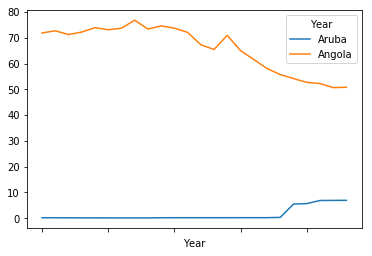

In [217]:
df_test.plot(x='Year',y=['Aruba', 'Angola'])

In [218]:
test_list = df_test.columns.values.tolist()

In [220]:
test_list.pop(0)

'Year'

C:\Anaconda\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000D3BAD2CC88>,
      dtype=object)

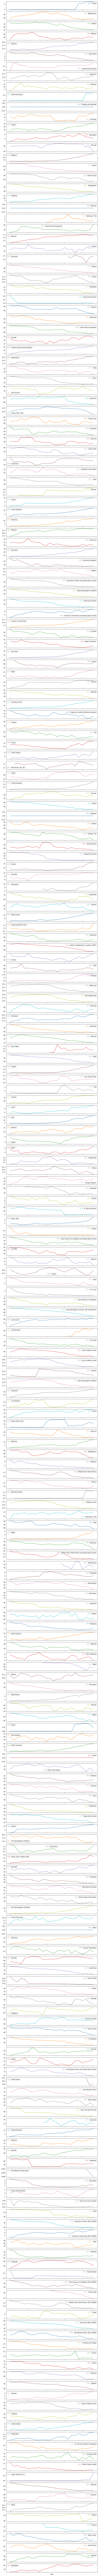

In [227]:
df_test.plot(x='Year', y=test_list, subplots=True, figsize=(12, 383))